In [1]:
import sys
sys.path.append('../fsm/action.py')
sys.path.append('../fsm/machine.py')
sys.path.append('../fsm/state.py')
sys.path.append('../fsm/transition.py')
%run ../fsm/action.py
%run ../fsm/machine.py
%run ../fsm/state.py
%run ../fsm/transition.py
from graphviz import *

#user define states
states = ['0', '1', 'f']

#user define final states
finals = ['f']

#user define transitions
transitions = [
    { 'trigger': 'a', 'source': '0', 'dest': '1' },
    { 'trigger': 'c', 'source': '1', 'dest': 'f' },
    { 'trigger': 'b', 'source': '1', 'dest': '1' },
    { 'trigger': 'c', 'source': '0', 'dest': 'f' },
]

# Initialize model
class Graph(object):
    def __init__(self,states,finals,transitions):
        self.states = states
        self.finals = finals
        self.transitions = transitions
        
    def draw(self,file_name=None,hl_state=None,hl_trigger=None,trigger_state=None):
        #draw the FSM
        f = Digraph(filename=file_name)
        f.attr(rankdir='LR', size='8,5')
        f.attr('node', shape='doublecircle')
        for state in finals:
            if hl_state == state:
                f.node(state,style='filled',color='pink')
            else:
                f.node(state)
        f.attr('node', shape='circle')
        for state in states:
            if hl_state == state:
                f.node(state,style='filled',color='pink')
            else:
                f.node(state)
        f.attr('node', shape='circle')
        for transition in transitions:
            if hl_trigger == transition['trigger'] and trigger_state == transition['source']:
                f.edge(transition['source'],transition['dest'],transition['trigger'],style='filled',color='pink')
            else:
                f.edge(transition['source'],transition['dest'],transition['trigger'])
        return f

# pass user data into finite state machine
graph = Graph(states,finals,transitions)
machine = Fsm(graph, states=states, transitions=transitions, initial='0')

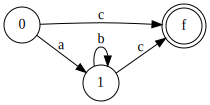

In [2]:
graph.draw()

In [3]:
#example usage: execution of FSM
#suppose we want to check if the FSM accept string 'abc'
check_str = 'abbbbc'

In [4]:
for i in range(len(check_str)):
    prev = graph.state
    machine.dispatch(check_str[i])
    graph.draw(file_name=str(i*2),hl_trigger=check_str[i],trigger_state=prev).render(format='png')
    graph.draw(file_name=str(i*2+1),hl_state=graph.state).render(format='png')

In [5]:
from ipywidgets import *
from IPython.display import Image
import time

def func(x):
    display(Image(filename=str(x)+'.png'))
    return x
    
interact(func, x=widgets.IntSlider(min=0, max=2*(len(check_str))-1, step=1));

interactive(children=(IntSlider(value=0, description='x', max=11), Output()), _dom_classes=('widget-interact',…